In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("../data/train_FD001.txt", sep='\s+', header=None)
test_df = pd.read_csv("../data/test_FD001.txt", sep='\s+', header=None)
rul_df = pd.read_csv("../data/RUL_FD001.txt", sep='\s+', header=None)

In [4]:
cols = ['unit', 'cycle'] + [f'os_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
train_df.columns = cols
test_df.columns = cols

In [5]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("RUL shape:", rul_df.shape)
train_df.head()

Train shape: (20631, 26)
Test shape: (13096, 26)
RUL shape: (100, 1)


,unit,cycle,os_1,os_2,os_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Number of engines: 100


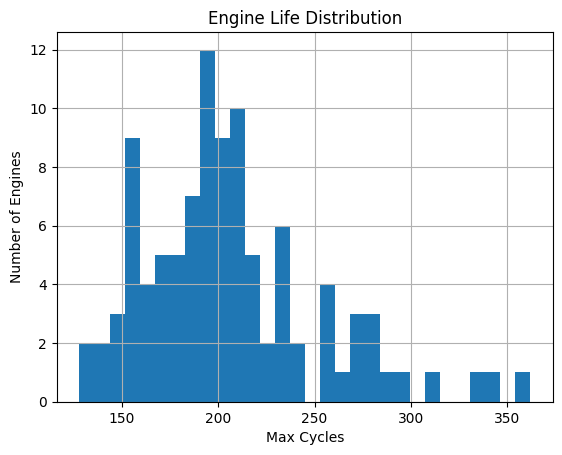

In [6]:
print("Number of engines:", train_df['unit'].nunique())
train_df.groupby('unit')['cycle'].max().hist(bins=30)
plt.title("Engine Life Distribution")
plt.xlabel("Max Cycles")
plt.ylabel("Number of Engines")
plt.show()

In [7]:
sensor_cols = [col for col in train_df.columns if 'sensor' in col]
train_df[sensor_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
sensor_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


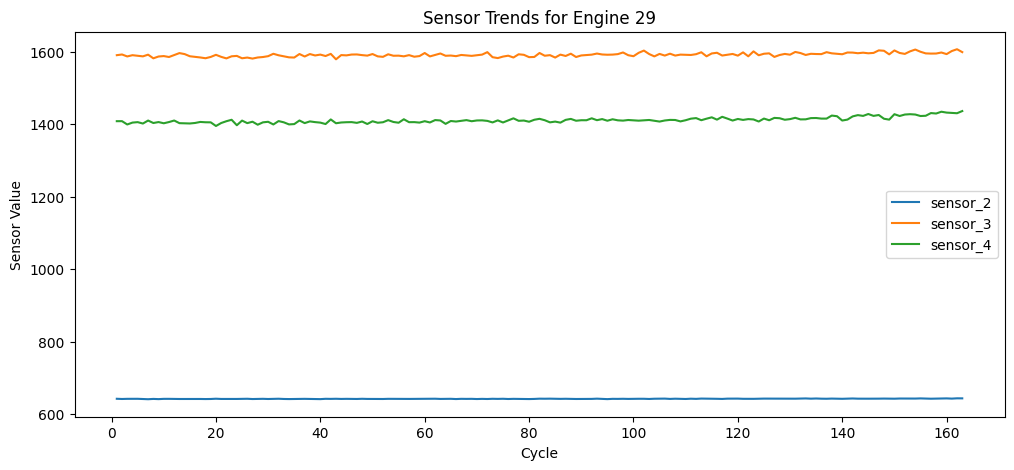

In [8]:
example_unit = np.random.choice(train_df['unit'].unique())
tmp = train_df[train_df['unit'] == example_unit]
plt.figure(figsize=(12, 5))
for sensor in ['sensor_2', 'sensor_3', 'sensor_4']:
    plt.plot(tmp['cycle'], tmp[sensor], label=sensor)
plt.title(f"Sensor Trends for Engine {example_unit}")
plt.xlabel("Cycle")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()

In [9]:
rul = train_df.groupby('unit')['cycle'].max().reset_index()
rul.columns = ['unit', 'max_cycle']
train_df = train_df.merge(rul, on='unit')
train_df['RUL'] = train_df['max_cycle'] - train_df['cycle']
train_df.drop('max_cycle', axis=1, inplace=True)
train_df.head()

,unit,cycle,os_1,os_2,os_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [10]:
from sklearn.preprocessing import MinMaxScaler
feat_cols = [col for col in train_df.columns if col not in ['unit', 'cycle', 'RUL']]
scaler = MinMaxScaler()
train_df[feat_cols] = scaler.fit_transform(train_df[feat_cols])

In [11]:
def windowize(df, seq_length=30):
    X, y = [], []
    units = df['unit'].unique()
    feat_cols = [col for col in df.columns if col not in ['unit', 'cycle', 'RUL']]
    for unit in units:
        unit_df = df[df['unit'] == unit]
        for i in range(len(unit_df) - seq_length + 1):
            X.append(unit_df.iloc[i:i+seq_length][feat_cols].values)
            y.append(unit_df.iloc[i+seq_length-1]['RUL'])
    return np.array(X), np.array(y)

X, y = windowize(train_df, seq_length=30)
print("Windowed X shape:", X.shape)
print("Windowed y shape:", y.shape)

Windowed X shape: (17731, 30, 24)
Windowed y shape: (17731,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(14184, 30, 24) (3547, 30, 24) (14184,) (3547,)


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

model = models.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Use the new '.keras' file extension for native Keras format
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = callbacks.ModelCheckpoint("../models/best_lstm.keras", save_best_only=True, monitor='val_loss')

history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

# (Optional: save the final model, too)
model.save("../models/final_lstm.keras")

Epoch 1/40
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 10029.6758 - mae: 80.3824 - val_loss: 4126.6553 - val_mae: 50.7799
Epoch 2/40
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4075.5386 - mae: 51.2893 - val_loss: 3826.6040 - val_mae: 50.4111
Epoch 3/40
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3846.3596 - mae: 50.5213 - val_loss: 3826.7524 - val_mae: 50.5703
Epoch 4/40
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3855.7964 - mae: 50.7512 - val_loss: 3827.2346 - val_mae: 50.6074
Epoch 5/40
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 3827.2681 - mae: 50.6634 - val_loss: 3506.5334 - val_mae: 48.1769
Epoch 6/40
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2573.8213 - mae: 38.5113 - val_loss: 1172.4628 - val_mae: 23.1061
Epoch 7/40
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1154.6190 - mae: 22.8878 - val_loss: 1018.1245 - val_mae: 21.2024
Epoch 8/40
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1057.6984 - mae: 21.7923 - val_loss: 1321.5282 - 

In [15]:
import tensorflow as tf
model = tf.keras.models.load_model("../models/best_lstm.keras")

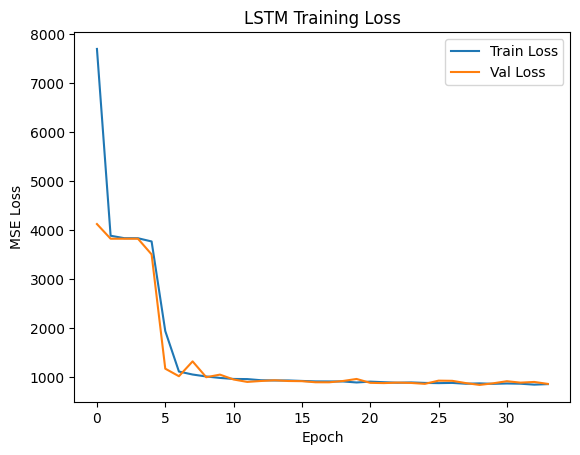

In [16]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("LSTM Training Loss")
plt.show()

In [18]:
model = tf.keras.models.load_model("../models/best_lstm.keras")
y_pred = model.predict(X_val)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse:.2f}")

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation RMSE: 28.99


In [25]:
# Save trained model in Keras format for Streamlit app
import os
os.makedirs("models", exist_ok=True)  # This creates the folder if it doesn't exist
model.save("models/best_lstm.keras")

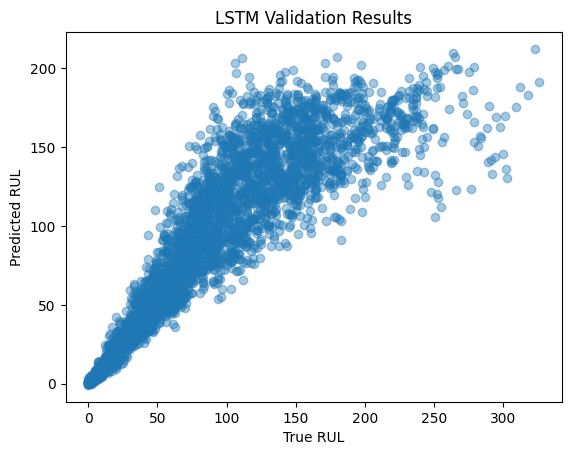

In [19]:
plt.scatter(y_val, y_pred, alpha=0.4)
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("LSTM Validation Results")
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load test data
test_df = pd.read_csv("../data/test_FD001.txt", sep='\s+', header=None)
cols = ['unit', 'cycle'] + [f'os_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
test_df.columns = cols

# Use the same feature columns and scaler as in training!
feat_cols = [col for col in test_df.columns if col not in ['unit', 'cycle']]

# (Optional but best) Fit scaler on *train* data, then use it here
# If you already have scaler from training, load/apply it here instead
scaler = MinMaxScaler()
# You should ideally fit scaler on train, so this is just a placeholder
# scaler.fit(train_df[feat_cols])  # Uncomment if you have train_df

test_df[feat_cols] = scaler.fit_transform(test_df[feat_cols])  # If using new scaler
# If you saved your scaler from training, load and use that instead for best results!

# Prepare windows (for each test unit, use last 30 cycles)
seq_length = 30
X_test = []
for unit in test_df['unit'].unique():
    unit_df = test_df[test_df['unit'] == unit]
    if len(unit_df) >= seq_length:
        window = unit_df.iloc[-seq_length:][feat_cols].values
        X_test.append(window)
X_test = np.array(X_test)
print("X_test shape:", X_test.shape)

# Save as .npy file for later
np.save("../data/X_test_FD001.npy", X_test)

X_test shape: (100, 30, 24)


In [23]:
# Suppose you already windowized/processed test data as X_test
# Load preprocessed test data
X_test = np.load("../data/X_test_FD001.npy")

# Predict RUL for each test sequence
y_test_pred = model.predict(X_test)

# Load true RUL values
true_rul = np.loadtxt("../data/RUL_FD001.txt")

from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(true_rul, y_test_pred[:len(true_rul)]))
print(f"Test RMSE: {rmse_test:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step
Test RMSE: 38.12


In [27]:
import tensorflow as tf
model = tf.keras.models.load_model("models/best_lstm.keras")  # If this loads without error
model.save("models/best_lstm.keras")

In [28]:
model.save("models/best_lstm.h5")